In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

In [3]:
#load the data set
crops= pd.read_csv('C:\\Users\\CHINEDUM\Desktop\\CHINEDUM\\Data Cmap notes\\MACHINE LEARNING\\PROJECTS\\Crop_recommendation.csv')

In [4]:
crops.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


In [6]:
crops.isna().sum()

N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64

In [7]:
crops.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [8]:
crops.label.unique()

array(['rice', 'maize', 'chickpea', 'kidneybeans', 'pigeonpeas',
       'mothbeans', 'mungbean', 'blackgram', 'lentil', 'pomegranate',
       'banana', 'mango', 'grapes', 'watermelon', 'muskmelon', 'apple',
       'orange', 'papaya', 'coconut', 'cotton', 'jute', 'coffee'],
      dtype=object)

In [ ]:

sns.catplot(data=df, x="age", y="class", hue="sex", kind="boxen")

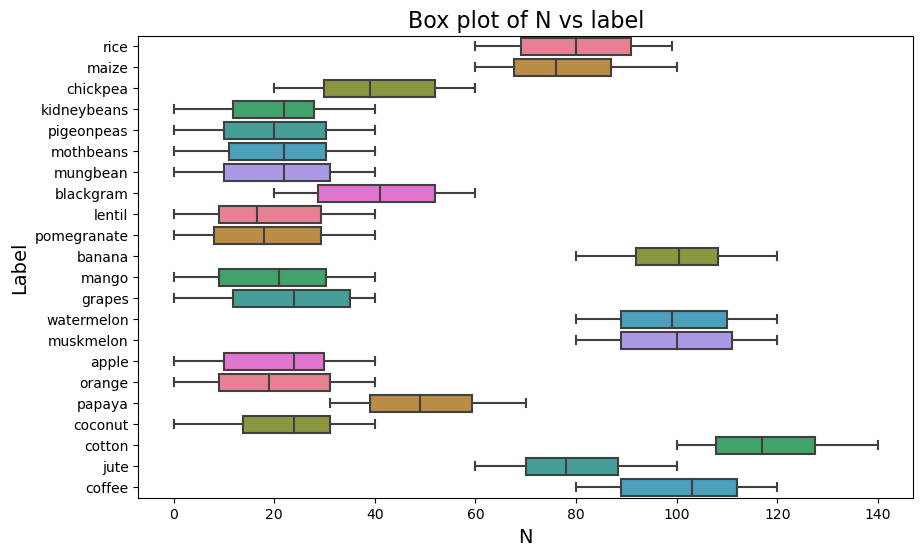

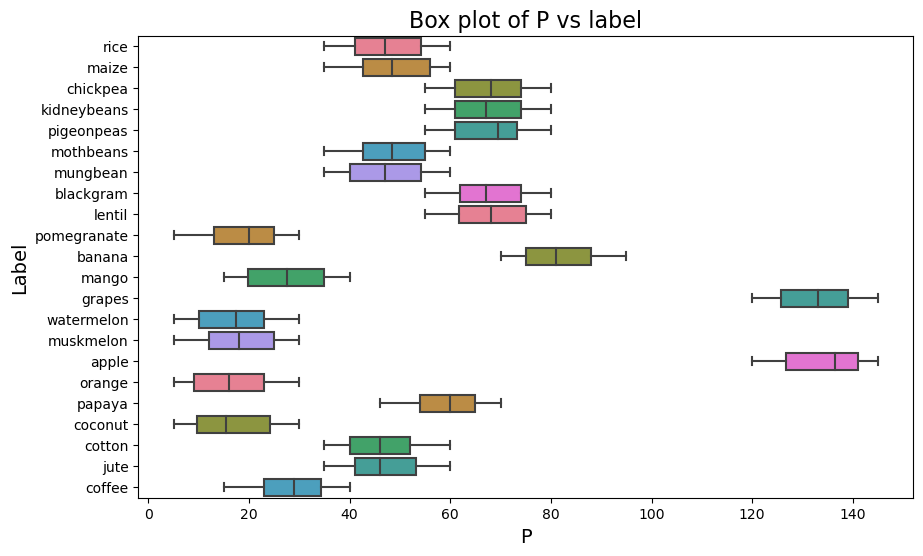

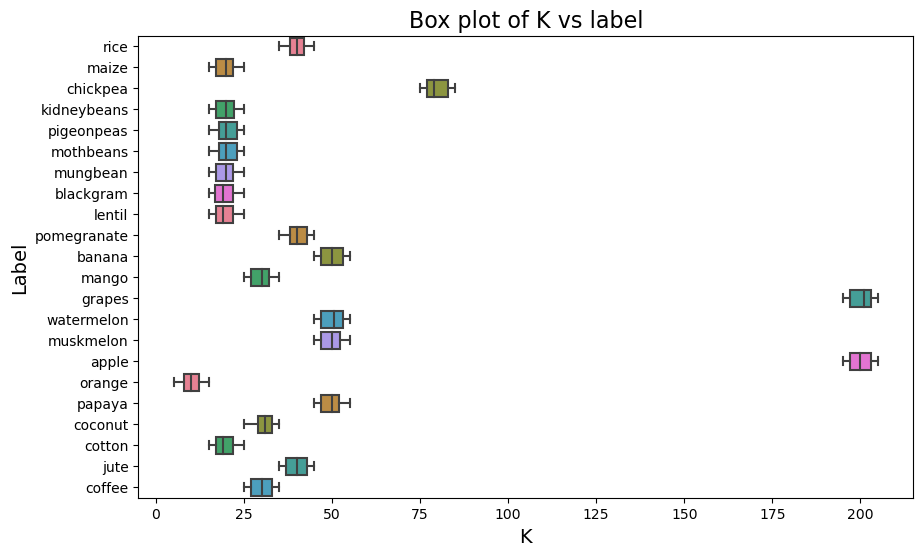

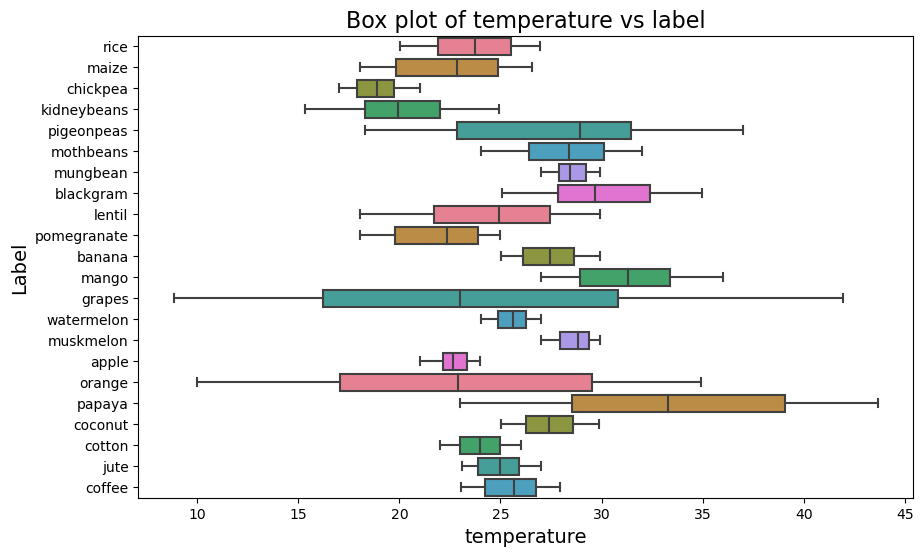

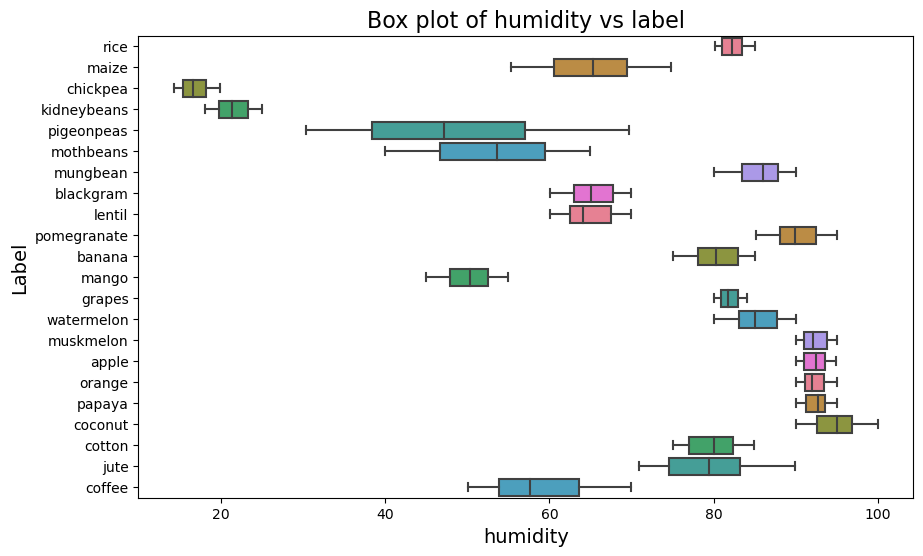

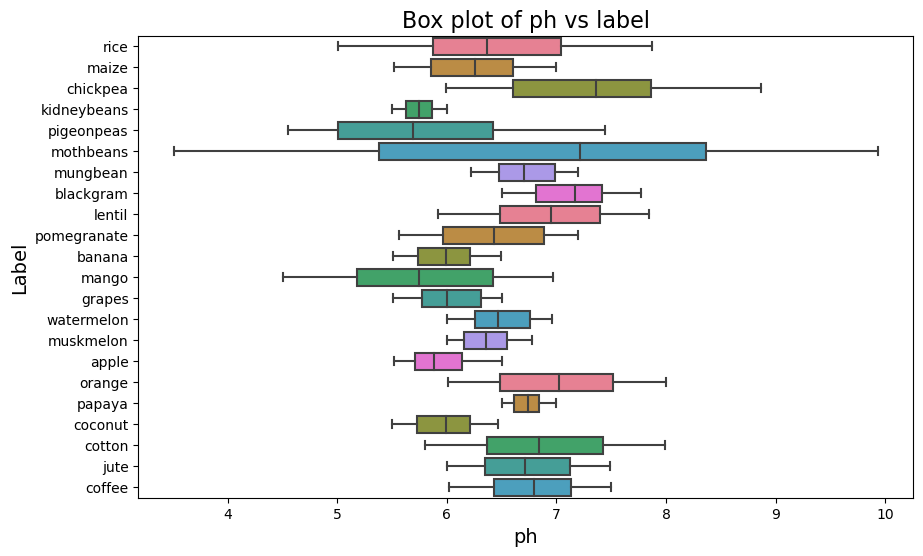

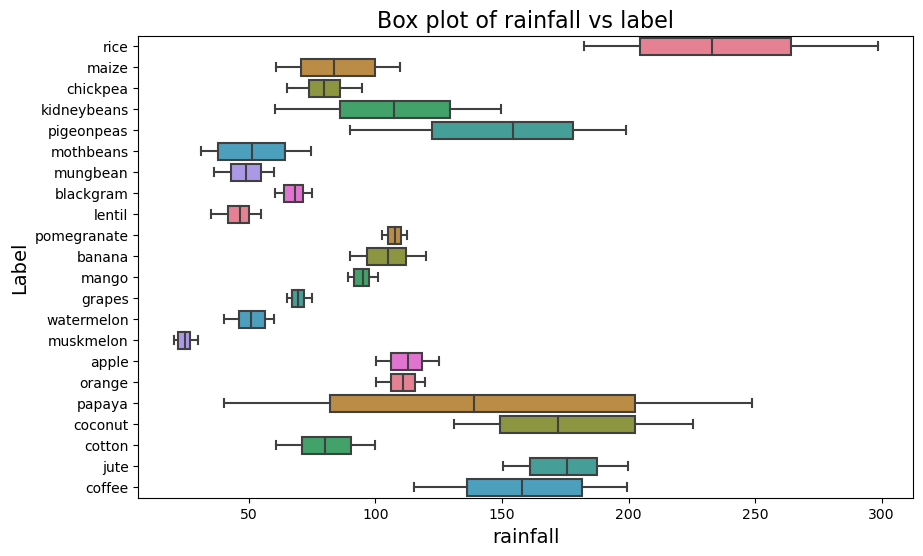

In [14]:
columns= ['N','P','K','temperature', 'humidity', 'ph', 'rainfall']

# Define a color palette
palette = sns.color_palette("husl", 8)

# Loop through columns
for column in columns:
    # Create a figure and axis
    fig, ax = plt.subplots(figsize=(10, 6))
    
    # Create the box plot
    sns.boxplot(data=crops, x=column, y="label", palette=palette, ax=ax)
    
    # Set the title and labels
    ax.set_title(f'Box plot of {column} vs label', fontsize=16)
    ax.set_xlabel(column, fontsize=14)
    ax.set_ylabel('Label', fontsize=14)
    
    # Show the plot
    plt.show()

<AxesSubplot: xlabel='count', ylabel='label'>

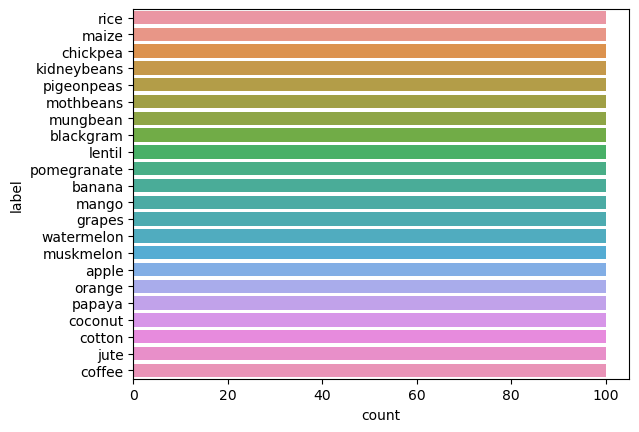

In [16]:
sns.countplot(y='label', data=crops)


In [23]:
crops['label'] =crops['label'] .astype('category')
crops['label_code']  = crops['label'] .cat.codes
crops[['label','label_code']].nunique()

label         22
label_code    22
dtype: int64

In [18]:
crops.head(5)

,N,P,K,temperature,humidity,ph,rainfall,label,label_code
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice,20
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice,20
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice,20
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice,20
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice,20


In [24]:
X= crops[['N','P','K','temperature', 'humidity', 'ph', 'rainfall']]
y= crops['label_code']

In [27]:
from sklearn.model_selection import GridSearchCV

# Define the logistic regression model
log_reg = LogisticRegression(solver='saga', multi_class='multinomial')

# Define the hyperparameters grid to search
param_grid = {
   'max_iter': [100, 200, 300, 400]
}

# Perform grid search with cross-validation
grid_search = GridSearchCV(log_reg, param_grid, cv=5, n_jobs=-1, verbose=2, scoring='accuracy')
grid_search.fit(X, y)

# Print the best parameters found
print("Best parameters: ", grid_search.best_params_)


Fitting 5 folds for each of 4 candidates, totalling 20 fits
Best parameters:  {'max_iter': 300}


C:\Users\CHINEDUM\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [32]:
from sklearn.metrics import f1_score
for feature in ["N", "P", "K", "ph"]:
    log_reg = LogisticRegression(
        max_iter=2000,
        multi_class="multinomial",
    )
    log_reg.fit(X_train[[feature]], y_train)
    y_pred = log_reg.predict(X_test[[feature]])
    f1 = f1_score(y_test, y_pred, average="weighted")
    print(f"F1-score for {feature}: {f1}")

F1-score for N: 0.10187518380875378


C:\Users\CHINEDUM\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


F1-score for P: 0.13770290642069416
F1-score for K: 0.20349279438334908
F1-score for ph: 0.04532731061152114


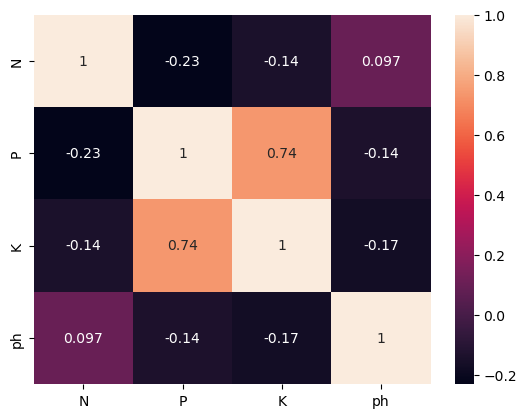

In [41]:
crops_corr = crops[["N", "P", "K", "ph"]].corr()
sns.heatmap(crops_corr, annot=True)
plt.show()

In [44]:
final_features = ["N",'P',"K", "ph"]
X_train, X_test, y_train, y_test = train_test_split(
    crops[final_features],
    crops["label_code"],
    test_size=0.2,
    random_state=42
)
log_reg = LogisticRegression(
    max_iter=2000, 
    multi_class="multinomial"
)
log_reg.fit(X_train, y_train)

C:\Users\CHINEDUM\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=2000, multi_class='multinomial')

In [45]:
y_pred = log_reg.predict(X_test)
model_performance = f1_score(y_test, y_pred, average="weighted")
model_performance

0.6510467330960461

In [ ]:
#USING STANDARD SCALAR PREPROCESSING

In [56]:
X= crops[["N",'P',"K", "ph"]]
y= crops['label_code']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [57]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [58]:
log_reg = LogisticRegression(solver='saga', multi_class='multinomial')
log_reg.fit(X_train_scaled, y_train)


LogisticRegression(multi_class='multinomial', solver='saga')

In [61]:
y_pred = log_reg.predict(X_test_scaled)
model_performance = f1_score(y_test, y_pred, average="weighted")
model_performance

0.6475209891596989